In [1]:
from evaluation_metric import *
from baseline_model import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings("ignore")

In [7]:
p1 = pd.read_csv('Output/p_baseline_5_train.csv', index_col='customer_ID')
p2 = pd.read_csv('Output/p_baseline_6_train_agg.csv', index_col='customer_ID')
train_labels = pd.read_pickle('Data/train_labels.pkl').loc[p1.index]

In [5]:
train = pd.concat([p1, p2], axis=1)

In [9]:
models, df_scores, importances, df_results = base_model_lgbm(train, train_labels)

Fold: 0 - seed: 0
[LightGBM] [Info] Number of positive: 95062, number of negative: 272068
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 367130, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258933 -> initscore=-1.051523
[LightGBM] [Info] Start training from score -1.051523
Training until validation scores don't improve for 500 rounds
[2000]	valid_0's binary_logloss: 0.194425	valid_0's AMEX: 0.831962
Early stopping, best iteration is:
[2400]	valid_0's binary_logloss: 0.194085	valid_0's AMEX: 0.832321
Fold: 0 - seed: 0 - score 83.23%
Fold: 0 - seed: 1
[LightGBM] [Info] Number of positive: 95062, number of negative: 272068
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the o

In [10]:
pickle.dump(models, open("Models/models_ensemble.pkl", "wb"))
pickle.dump(importances, open("Models/importances_ensemble.pkl", "wb"))

In [15]:
df_results

seed,0,1,fold_mean
fold,,,
0,0.832321,0.832989,0.832655
1,0.829473,0.831197,0.830335
2,0.827966,0.829219,0.828592
3,0.835199,0.834905,0.835052
4,0.826027,0.826564,0.826295
seed_mean,0.830197,0.830975,0.830586


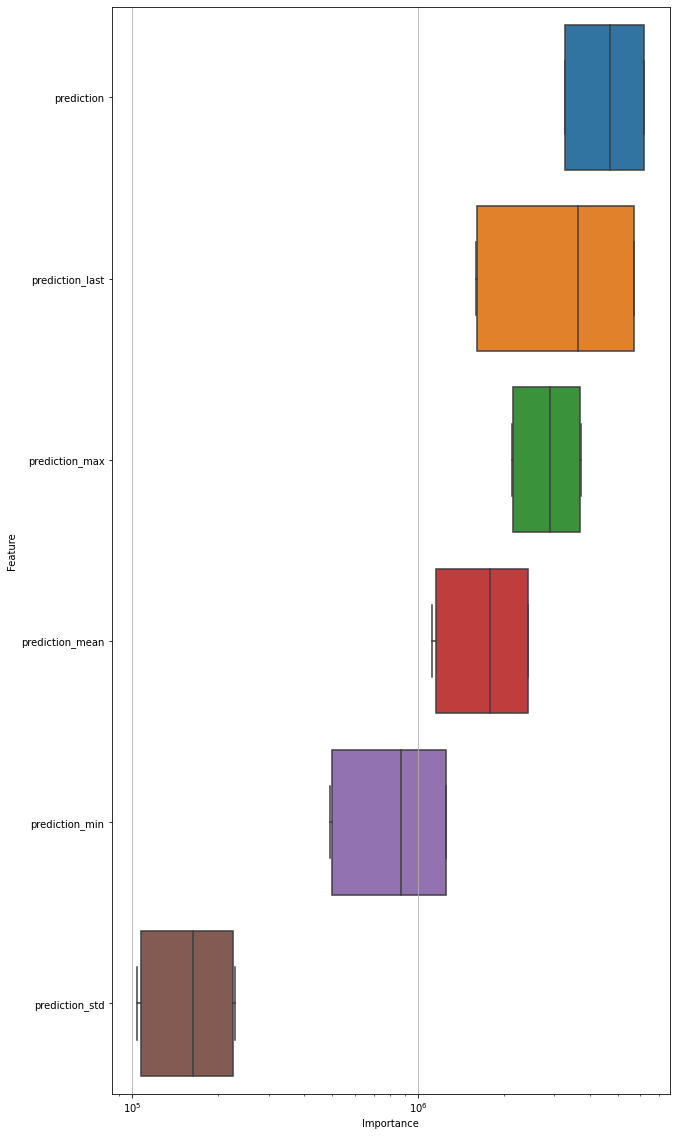

In [11]:
importances = pickle.load(open("Models/importances_ensemble.pkl", "rb"))
def plot_importance(ii, features, PLOT_TOP_N = 50, figsize=(10, 10)):
    importance_df = pd.DataFrame(data=importances, columns=features)
    sorted_indices = importance_df.median(axis=0).sort_values(ascending=False).index
    sorted_importance_df = importance_df.loc[:, sorted_indices]
    plot_cols = sorted_importance_df.columns[:PLOT_TOP_N]
    _, ax = plt.subplots(figsize=figsize)
    ax.grid()
    ax.set_xscale('log')
    ax.set_ylabel('Feature')
    ax.set_xlabel('Importance')
    sns.boxplot(data=sorted_importance_df[plot_cols],
                orient='h',
                ax=ax)
    plt.show()
    
plot_importance(np.array(importances),train.columns, PLOT_TOP_N = 50, figsize=(10, 20))

In [12]:
p1_test = pd.read_csv('Output/p_baseline_5_test.csv', index_col='customer_ID')
p2_test = pd.read_csv('Output/p_baseline_6_test_agg.csv', index_col='customer_ID')
test = pd.concat([p1_test, p2_test], axis=1)

In [13]:
prediction_list = []
for keys in models.keys():
    prediction_list.append(models[keys].predict(test))

prediction_df = pd.DataFrame(prediction_list).T
prediction_df.index = test.index

In [14]:
prediction_df.mean(axis=1).to_csv('Output/p_ensemble.csv',header=['prediction'])

In [20]:
prediction_df

,0,1,2,3,4,5,6,7,8,9
customer_ID,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.020216,0.025179,0.022331,0.028232,0.021624,0.028360,0.021291,0.029601,0.021768,0.025379
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.000377,0.000236,0.000160,0.000176,0.000271,0.000195,0.000520,0.000334,0.000325,0.000269
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.034057,0.030509,0.034630,0.033217,0.035283,0.032984,0.043172,0.036343,0.033173,0.030542
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.214902,0.211433,0.224476,0.225818,0.229136,0.241121,0.225142,0.234561,0.221803,0.229291
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.882868,0.880309,0.889936,0.874872,0.869313,0.862484,0.884684,0.878161,0.891358,0.890621
...,...,...,...,...,...,...,...,...,...,...
ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c5d60460dba6dedc41e,0.006583,0.011675,0.006537,0.009194,0.006996,0.010695,0.004050,0.007503,0.007818,0.008414
ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3a4f0ca3de613b0b2ad,0.784557,0.760640,0.768210,0.771154,0.792950,0.773279,0.749139,0.778119,0.785153,0.774365
ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475cb095d2443a68030f1,0.465095,0.473785,0.436535,0.453781,0.443923,0.442764,0.509489,0.526670,0.500959,0.505120
